### **E-MAIL(HAM OR SPAM) CLASSIFICATION USING NAIVE BAYES CLASSIFIER**

### Importing useful python libraries

In [1]:
import string
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer

### **About the dataset:**
The e-mail dataset contains two different folders, containg text files having some message written in it, named as 'ham' and 'spam' describing the categories of e-mail to be classified.

#### Extracting files from both folders

In [2]:
ham_path = '/content/drive/MyDrive/Tasks/task(reg,knn,naive,tree)/NaiveBayes/email/ham'
ham_files = glob.glob(ham_path+"/*")
print('number of files of class ham: ',len(ham_files))

spam_path = '/content/drive/MyDrive/Tasks/task(reg,knn,naive,tree)/NaiveBayes/email/spam'
spam_files = glob.glob(spam_path+"/*")
print('number of files of class spam: ',len(spam_files))

number of files of class ham:  25
number of files of class spam:  25


### **Fething up data from files**

### HAM

In [3]:
#extracting the encoded text from files
ham = []
ham_label = []
ham_txt_len = []
for file in ham_files:
  txt = open(file, 'r', encoding='cp1252').read()
  ham.append(txt)
  ham_label.append('ham')

#removing backslash, carriage return, and whitespace characters from string text 
#Also, calculating the length of each string text.
ham_conv = []
for num in range(len(ham)):
  t = ham[num].maketrans("\n\t\r", "   ")
  
  ham_conv.append(ham[num].translate(t))
  ham_txt_len.append(len(ham[num].translate(t)))
  
#estimating punctuation count in each string text
ham_punct_cnt = []
for sent in  ham_conv:
  count=0
  for ch in sent:
    if ch in string.punctuation:
      count = count+1
  ham_punct_cnt.append(count)
print("----------E-mail of class 'Ham'------------")
print("Extracted text from the files: ", ham_conv)
print("Length of each text: ", ham_txt_len)
print("Punctuation count of each text: ", ham_punct_cnt)

----------E-mail of class 'Ham'------------
Extracted text from the files:  ["Thanks Peter.  I'll definitely check in on this. How is your book going? I heard chapter 1 came in and it was in  good shape. ;-)  I hope you are doing well.  Cheers,  Troy", 'Arvind Thirumalai commented on your status.  Arvind wrote: ""you know""   Reply to this email to comment on this status.  ', 'Ryan Whybrew commented on your status.  Ryan wrote: "turd ferguson or butt horn." ', 'Jay Stepp commented on your status.  Jay wrote: ""to the" ???"   Reply to this email to comment on this status.  To see the comment thread, follow the link below:  ', "LinkedIn  Kerry Haloney requested to add you as a connection on LinkedIn:  Peter,  I'd like to add you to my professional network on LinkedIn.  - Kerry Haloney   ", 'Hi Peter,   The hotels are the ones that rent out the tent. They are all lined up on the hotel grounds : )) So much for being one with nature, more like being one with a couple dozen tour groups and n

We have extracted the useful data from the 'ham' class e-mail text files

### SPAM

In [4]:
#extracting the encoded text from files
spam = []
spam_label = []
spam_txt_len = []
for file in spam_files:
  txt = open(file, 'r', encoding='cp1252').read()
  spam.append(txt)
  spam_label.append('spam')

#removing backslash, carriage return, and whitespace characters from string text 
#Also, calculating the length of each string text.
spam_conv = []
for num in range(len(spam)):
  t = spam[num].maketrans("\n\t\r", "   ")
  
  spam_conv.append(spam[num].translate(t))
  spam_txt_len.append(len(spam[num].translate(t)))

#estimating punctuation count in each string text
spam_punct_cnt = []
for sent in  spam_conv:
  count=0
  for ch in sent:
    if ch in string.punctuation:
      count = count+1
  spam_punct_cnt.append(count)

print("----------E-mail of class 'Spam'------------")
print("Extracted text from the files: ", spam_conv)
print("Length of each text: ", spam_txt_len)
print("Punctuation count of each text: ", spam_punct_cnt)

----------E-mail of class 'Spam'------------
Extracted text from the files:  ['--- Codeine 15mg -- 30 for $203.70 -- VISA Only!!! --  -- Codeine (Methylmorphine) is a narcotic (opioid) pain reliever -- We have 15mg & 30mg pills -- 30/15mg for $203.70 - 60/15mg for $385.80 - 90/15mg for $562.50 -- VISA Only!!! ---', 'OrderCializViagra Online & Save 75-90%  0nline Pharmacy NoPrescription required Buy Canadian Drugs at Wholesale Prices and Save 75-90% FDA-Approved drugs + Superb Quality Drugs only! Accept all major credit cards', 'You Have Everything To Gain!  Incredib1e gains in length of 3-4 inches to yourPenis, PERMANANTLY  Amazing increase in thickness of yourPenis, up to 30% BetterEjacu1ation control Experience Rock-HardErecetions Explosive, intenseOrgasns Increase volume ofEjacu1ate Doctor designed and endorsed 100% herbal, 100% Natural, 100% Safe The proven NaturalPenisEnhancement that works! 100% MoneyBack Guaranteeed', 'Buy Ambiem (Zolpidem) 5mg/10mg @ $2.39/- pill  30 pills x 5 

### **Preparing dataset**
Preparing separate datasets of different classes; ham and spam
The dataset will contain message(text of email), length of each message, number of punctuations used in each message, and its corresponding label(to which class the message or email belongs)

### HAM DATASET

In [5]:
#ham data
ham_data = pd.DataFrame(ham_conv, columns=['message'])
ham_data['length'] = ham_txt_len
ham_data['punctuations'] = ham_punct_cnt
ham_data['label'] = ham_label
ham_data.head()

,message,length,punctuations,label
0,Thanks Peter. I'll definitely check in on thi...,172,10,ham
1,Arvind Thirumalai commented on your status. A...,122,7,ham
2,Ryan Whybrew commented on your status. Ryan w...,82,5,ham
3,Jay Stepp commented on your status. Jay wrote...,164,12,ham
4,LinkedIn Kerry Haloney requested to add you a...,162,5,ham


Attributes of this datasets are:
- message; text or message written in email
- length; length of corresponding message
- punctuations; punctuation count in that particular message
- label; corresponding label

### SPAM DATASET

In [6]:
#spam data
spam_data = pd.DataFrame(spam_conv, columns=['message'])
spam_data['length'] = spam_txt_len
spam_data['punctuations'] = spam_punct_cnt
spam_data['label'] = spam_label
spam_data.head()

,message,length,punctuations,label
0,--- Codeine 15mg -- 30 for $203.70 -- VISA Onl...,235,44,spam
1,OrderCializViagra Online & Save 75-90% 0nline...,212,8,spam
2,You Have Everything To Gain! Incredib1e gains...,402,14,spam
3,Buy Ambiem (Zolpidem) 5mg/10mg @ $2.39/- pill ...,182,23,spam
4,OrderCializViagra Online & Save 75-90% 0nline...,245,11,spam


This dataset also contains same attributes as described in HAM DATASET

### **Exloratory Data Analysis**
Going deep into the data to get some appropriate and necessary information regarding datasets to be used for classification

In [7]:
print("Shape of Spam dataset: ", spam_data.shape)
print("Shape of Ham dataset: ", ham_data.shape)

Shape of Spam dataset:  (25, 4)
Shape of Ham dataset:  (25, 4)


#### Combining datasets

In [8]:
data = pd.concat([ham_data,spam_data],axis = 0)

This data contains both type of emails; ham and spam

### Statistical Analysis of data

In [9]:
data.describe()

,length,punctuations
count,50.000000,50.000000
mean,277.480000,14.820000
std,212.639797,14.736724
min,42.000000,1.000000
25%,162.500000,7.250000
50%,233.500000,12.000000
75%,328.000000,16.750000
max,1458.000000,95.000000


The dataset contains total 50 e-mails belong to different classes(ham and spam). 

In [10]:
#Statistical analysis of Label
data.groupby('label').describe()

length                                    ... punctuations                        
       count    mean         std    min    25%  ...          min   25%   50%   75%   max
label                                           ...                                     
ham     25.0  278.68  295.079328   42.0  122.0  ...          1.0   5.0   9.0  12.0  95.0
spam    25.0  276.28   72.391597  161.0  226.0  ...          5.0  12.0  14.0  20.0  44.0

[2 rows x 16 columns]

### Visualizing dataset

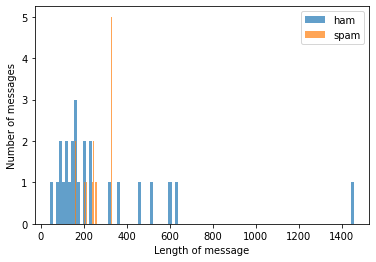

In [11]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7, label=['ham'])
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7, label=['spam'])
plt.xlabel("Length of message")
plt.ylabel("Number of messages")
plt.legend()
plt.show()

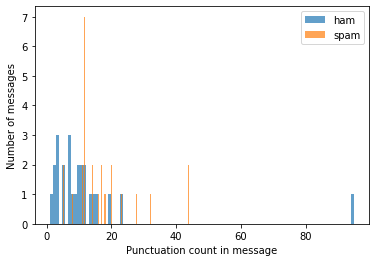

In [12]:
plt.hist(data[data['label']=='ham']['punctuations'],bins=100,alpha=0.7, label=['ham'])
plt.hist(data[data['label']=='spam']['punctuations'],bins=100,alpha=0.7, label=['spam'])
plt.xlabel("Punctuation count in message")
plt.ylabel("Number of messages")
plt.legend()
plt.show()

### Let's visualize the ratio of ham and spam emails in the dataset

([<matplotlib.patches.Wedge at 0x7f63a713a850>,
 [Text(6.735557395310444e-17, 1.1, 'ham'),
  Text(-2.0206672185931328e-16, -1.1, 'spam')])

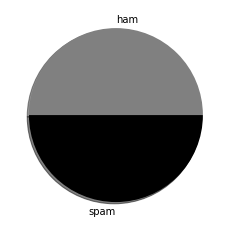

In [13]:
plt.pie(data['label'].value_counts(), labels = ['ham', 'spam'], colors=['grey', 'black'], shadow=True)

This shows that the dataset contains equal number of ham emails as well as spam emails

### **Splitting the dataset into Training and Testing datasets**
The dataset needs to be splitted for the training purpose and also to know the performance of classifier towards the right classification

In [25]:
x_train, x_test, y_train,y_test=train_test_split(data['message'],data['label'], random_state=0, test_size=0.3,shuffle=True,stratify=data['label'])

### Text Preprocessing
Using tf-idf vectorizer, texts are going to be preprocessed as the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer

In [26]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(x_train)
X_test=vectorizer.transform(x_test)

In [27]:
X_train = X_train.toarray()
X_test = X_test.toarray()
print("Shape of Traning data: ", X_train.shape)
print("Shape of Testing data: ", X_test.shape)

Shape of Traning data:  (35, 633)
Shape of Testing data:  (15, 633)


### **Preparing the Classifier**
Instantiating GaussianNB classifier for classification task. It is a type og Naive-Bayes algorithm.

In [28]:
model = GaussianNB()

#fitting the modelfor training
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predicting the outcomes

In [29]:
ypred = model.predict(X_test)

### Here, given the dataset for the analysis of classified outcomes with respect to true classes

In [30]:
comparison_df = pd.DataFrame(y_test)
comparison_df.rename(columns = {'label' : 'True Values'}, inplace = True)
comparison_df['Predicted Values'] = ypred
comparison_df

,True Values,Predicted Values
15,spam,spam
21,ham,ham
15,ham,ham
9,ham,ham
4,ham,ham
0,ham,ham
7,ham,ham
16,spam,ham
5,spam,spam
21,spam,spam


We can observed that the classifier performed well in classifying the emails.

### **Evaluation and Visualization of result**
### Confusion Matrix

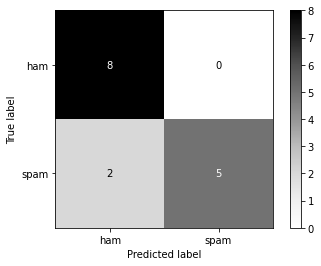

In [31]:
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, labels=['ham', 'spam'], cmap='Greys')

### Classification Report

In [32]:
print(classification_report(y_test, ypred, labels=['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.80      1.00      0.89         8
        spam       1.00      0.71      0.83         7

    accuracy                           0.87        15
   macro avg       0.90      0.86      0.86        15
weighted avg       0.89      0.87      0.86        15



### ROC AUC CURVE

In [33]:
ypred = LabelEncoder().fit_transform(ypred)
y_test = LabelEncoder().fit_transform(y_test)
fp, tp, thresh = roc_curve(y_test, ypred)

In [34]:
roc_auc_score(y_test, ypred)

0.8571428571428572

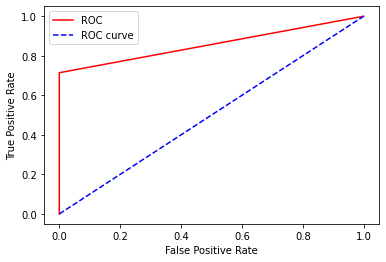

In [35]:
plt.plot(fp, tp, color='red', label='ROC', )
plt.plot([0,1],[0,1], color='blue', linestyle='--', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()